In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import pprint 
import seaborn as sns
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
# import sentiment and graph data
sentiment_df_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object', 'post_sentiment_dict':'object',
       'post_pos_sentiment':'float', 'post_neg_sentiment':'float', 'post_compound_sentiment':'float'}
# change path as per your drive 
harvard_sentiment_df = pd.read_csv('processed_data/harvard/harvard_sentiment_new.csv', dtype=sentiment_df_dtypes, usecols=sentiment_df_dtypes.keys())


In [ ]:
harvard_sentiment_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,l26vnc,yonsah,102.0,0.98,39,Harvard,I just received an email stating that they rec...,"[{'author': 'None', 'body': '[deleted]', 'scor...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
1,t287da,yesseecahh,22.0,0.85,4,Harvard,My friend and I are chemistry graduate student...,"[{'author': 'gacdeuce', 'body': 'Miracle of Sc...","{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'comp...",0.072,0.000,0.5574
2,l2vwb7,yasme996,31.0,0.93,19,Harvard,I'm a student at another college and was wonde...,"[{'author': 'None', 'body': 'I’m a Berkeley st...","{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp...",0.094,0.000,0.5157
3,ioerw2,xyzaffairs,75.0,0.98,19,Harvard,First-year on campus right now. Everyone seems...,"[{'author': 'pinkstardust007', 'body': ""Don't ...","{'neg': 0.104, 'neu': 0.798, 'pos': 0.098, 'co...",0.098,0.104,-0.1635
4,fqku9j,xyzaffairs,26.0,0.86,25,Harvard,Hi! I'm in the process of making the hardest b...,"[{'author': 'tomfjord', 'body': 'If you’re fro...","{'neg': 0.008, 'neu': 0.71, 'pos': 0.283, 'com...",0.283,0.008,0.9970
...,...,...,...,...,...,...,...,...,...,...,...,...
489,jq7kae,9986000min,29.0,0.98,8,Harvard,Someone sent me an email detailing a tentative...,"[{'author': 'impendinggreatness', 'body': 'I h...","{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.154,0.000,0.5362
490,tb0gdr,7ranslunar,25.0,0.88,5,Harvard,Hi everyone! I’m a first year who got quadded ...,"[{'author': 'None', 'body': 'I mean, it’s not ...","{'neg': 0.102, 'neu': 0.771, 'pos': 0.127, 'co...",0.127,0.102,0.4462
491,lrzmd4,656c696a6168,20.0,0.88,12,Harvard,"As a student or as a tour destination, either ...","[{'author': 'mikepetroff', 'body': ""Janis Jopl...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
492,ryobcm,4YearAbsence,39.0,0.98,13,Harvard,My last semester at the college was in Fall of...,"[{'author': '1d4d5_2Bf4', 'body': ""1. Yep that...","{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp...",0.046,0.000,0.8541


In [ ]:
harvard_sentiment_df['comments'] = harvard_sentiment_df['comments'].apply(lambda x: eval(x))
# berkeley_sentiment_df['comment_sentiment_list'] = berkeley_sentiment_df['comment_sentiment_list'].apply(lambda x: eval(x))
harvard_sentiment_df['post_sentiment_dict'] = harvard_sentiment_df['post_sentiment_dict'].apply(lambda x: eval(x))

In [ ]:
harvard_sentiment_df.columns

Index(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext', 'comments', 'post_sentiment_dict', 'post_pos_sentiment',
       'post_neg_sentiment', 'post_compound_sentiment'],
      dtype='object')

In [ ]:
# import centrality data
centrality_df_dtype = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
harvard_centrality_df = pd.read_csv('processed_data/harvard/harvard_centrality_poster.csv', dtype=centrality_df_dtype, usecols=centrality_df_dtype.keys())

In [ ]:
harvard_regression_df = harvard_sentiment_df[['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'upvote_ratio']].merge(harvard_centrality_df, on='author', how='left')

In [ ]:
harvard_regression_df

,author,post_pos_sentiment,post_neg_sentiment,num_comments,post_compound_sentiment,upvote_ratio,btw_centrality,deg_centrality,eig_centrality,pagerank,clustering_coeff
0,yonsah,0.000,0.000,39,0.0000,0.98,0.007413,0.006072,0.033575,0.000607,0.044444
1,yesseecahh,0.072,0.000,4,0.5574,0.85,0.000200,0.001821,0.030097,0.000607,0.333333
2,yasme996,0.094,0.000,19,0.5157,0.93,0.003847,0.005464,0.033693,0.000607,0.083333
3,xyzaffairs,0.098,0.104,19,-0.1635,0.98,0.007672,0.010929,0.046053,0.000607,0.078431
4,xyzaffairs,0.283,0.008,25,0.9970,0.86,0.007672,0.010929,0.046053,0.000607,0.078431
...,...,...,...,...,...,...,...,...,...,...,...
489,9986000min,0.154,0.000,8,0.5362,0.98,0.000082,0.003643,0.008060,0.000607,0.000000
490,7ranslunar,0.127,0.102,5,0.4462,0.88,0.001851,0.003036,0.028423,0.000607,0.100000
491,656c696a6168,0.000,0.000,12,0.0000,0.88,0.003456,0.006072,0.013241,0.000607,0.022222
492,4YearAbsence,0.046,0.000,13,0.8541,0.98,0.003801,0.004857,0.032664,0.000607,0.071429


In [ ]:
harvard_regression_avg_df = harvard_regression_df.groupby('author').mean()

In [ ]:
harvard_regression_avg_df = harvard_regression_avg_df.reset_index()

In [ ]:
# fit a univariate regression model
def fit_regression_line(y, X, regressor):
  model = sm.OLS(y, X)
  results = model.fit()

  param = results.params
  fitted = np.transpose(X) * param

  fig, ax = plt.subplots(figsize=(8,4))
  plt.plot(X, y, 'o')
  plt.plot(X, fitted ,'-', label='coefficient: ' + str(round(param[0], 2)))
  ax.set_xlabel(regressor)
  ax.set_ylabel('post_pos_sentiment')
  plt.legend()
  plt.show()

In [ ]:
def fit_regression_line_intercept(y, X, regressor):
    X = sm.add_constant(X)  # adding a constant term for intercept
    model = sm.OLS(y, X)
    results = model.fit()

    param = results.params
    fitted = np.dot(X, param)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(X[:, 1], y, 'o')  # X[:, 1] since X[:, 0] is the constant term
    plt.plot(X[:, 1], fitted ,'-', label='intercept: ' + str(round(param[0], 2)) +
                                        ', coefficient: ' + str(round(param[1], 2)))
    ax.set_xlabel(regressor)
    ax.set_ylabel('post_pos_sentiment')
    plt.legend()
    plt.show()



---



### eig_centrality vs post_pos_sentiment 
Model : 
<!-- $y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{eig-centrality} + \beta_2 \cdot X_{post-pos-sentiment} + \beta_3 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way. We also control for the number of comments, since the change aggregated comment sentiment may be driven by the number of comments the post has.  -->

In [ ]:
harvard_regression_avg_df.columns

Index(['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'upvote_ratio', 'btw_centrality',
       'deg_centrality', 'eig_centrality', 'pagerank', 'clustering_coeff'],
      dtype='object')

In [ ]:
# for all values of eig_centrality
X = harvard_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = harvard_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8479
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.468
Time:                        17:40:14   Log-Likelihood:                 328.02
No. Observations:                 348   AIC:                            -648.0
Df Residuals:                     344   BIC:                            -632.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2046      0.088      2.335      0.0

In [ ]:
# for all values of eig_centrality
X = harvard_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = harvard_regression_avg_df['post_compound_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.798
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.147
Time:                        17:44:46   Log-Likelihood:                -296.36
No. Observations:                 348   AIC:                             600.7
Df Residuals:                     344   BIC:                             616.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6637      0.527      1.259      0.2

In [ ]:
# for all values of eig_centrality
harvard_regression_avg_df['ln_eig_centrality'] = np.log(harvard_regression_avg_df['eig_centrality'])
X = harvard_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = harvard_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8519
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.466
Time:                        17:40:22   Log-Likelihood:                 328.03
No. Observations:                 348   AIC:                            -648.1
Df Residuals:                     344   BIC:                            -632.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2031      0.089      2.294      0.0

In [ ]:
# for all values of eig_centrality
harvard_regression_avg_df['ln_eig_centrality'] = np.log(harvard_regression_avg_df['eig_centrality'])
X = harvard_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = harvard_regression_avg_df['post_compound_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.183
Date:                Sun, 04 Jun 2023   Prob (F-statistic):             0.0898
Time:                        18:02:10   Log-Likelihood:                -295.78
No. Observations:                 348   AIC:                             599.6
Df Residuals:                     344   BIC:                             615.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5666      0.532      1.066      0.2

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = harvard_regression_avg_df[harvard_regression_avg_df['eig_centrality'] < 0.15][['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = harvard_regression_avg_df[harvard_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9222
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.430
Time:                        17:40:31   Log-Likelihood:                 325.27
No. Observations:                 346   AIC:                            -642.5
Df Residuals:                     342   BIC:                            -627.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2011      0.088      2.279      0.0

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = harvard_regression_avg_df[harvard_regression_avg_df['eig_centrality'] < 0.15][['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = harvard_regression_avg_df[harvard_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8470
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.469
Time:                        17:40:42   Log-Likelihood:                 325.16
No. Observations:                 346   AIC:                            -642.3
Df Residuals:                     342   BIC:                            -626.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2037      0.089      2.292      0.0

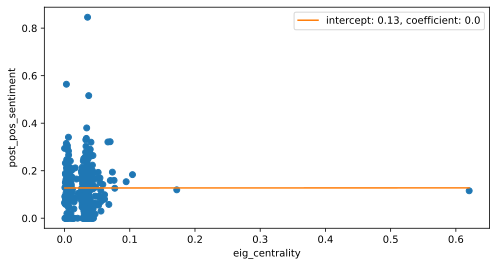

In [ ]:
fit_regression_line_intercept(harvard_regression_avg_df['post_pos_sentiment'].values, harvard_regression_avg_df['eig_centrality'].values, 'eig_centrality')

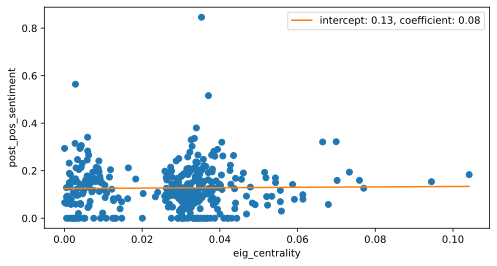

In [ ]:
fit_regression_line_intercept(harvard_regression_avg_df[harvard_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values, harvard_regression_avg_df[harvard_regression_avg_df['eig_centrality'] < 0.15]['eig_centrality'].values, 'eig_centrality')

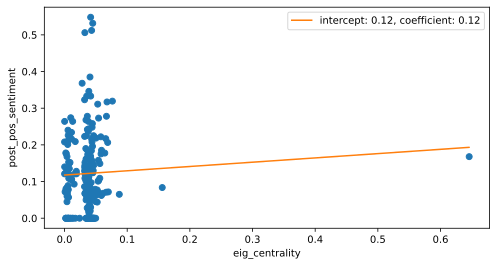

In [ ]:
fit_regression_line_intercept(cornell_regression_avg_df['post_pos_sentiment'].values, cornell_regression_avg_df['eig_centrality'].values, 'eig_centrality')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = cornell_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio', 'btw_centrality', 'deg_centrality', 'clustering_coeff']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [ ]:
vif

,VIF,variable
0,30.405055,eig_centrality
1,1.259977,num_comments
2,5.593760,upvote_ratio
3,24.254987,btw_centrality
4,52.031233,deg_centrality
5,4.174785,clustering_coeff


### deg_centrality vs post_pos_sentiment
<!-- Model : 
$y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{deg-centrality} + \beta_2 \cdot X_{post-pos-sentiment} + \beta_3 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way.  -->

(array([29., 42., 38., 36., 37., 30., 20., 12.,  8.,  3.,  3.,  2.,  2.,
         1.,  2.,  1.,  0.,  4.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00083626, 0.00201037, 0.00318448, 0.00435859, 0.0055327 ,
        0.00670681, 0.00788092, 0.00905503, 0.01022914, 0.01140324,
        0.01257735, 0.01375146, 0.01492557, 0.01609968, 0.01727379,
        0.0184479 , 0.01962201, 0.02079612, 0.02197023, 0.02314434,
        0.02431845, 0.02549256, 0.02666667, 0.02784078, 0.02901489,
        0.03018899, 0.0313631 , 0.03253721, 0.03371132, 0.03488543,
        0.03605954, 0.0372

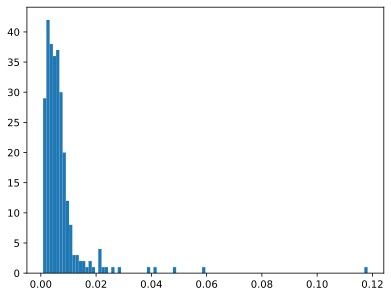

In [ ]:
plt.hist(berkeley_regression_avg_df['deg_centrality'].values, bins= 100)

In [ ]:
# for all values of eig_centrality
X = cornell_regression_avg_df[['deg_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2595
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.855
Time:                        17:37:50   Log-Likelihood:                 214.31
No. Observations:                 240   AIC:                            -420.6
Df Residuals:                     236   BIC:                            -406.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0690      0.180      0.384      0.7

In [ ]:
# for all values of eig_centrality
cornell_regression_avg_df['ln_deg_centrality'] = np.log(cornell_regression_avg_df['deg_centrality'])
X = cornell_regression_avg_df[['ln_deg_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3869
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.763
Time:                        17:37:59   Log-Likelihood:                 214.51
No. Observations:                 240   AIC:                            -421.0
Df Residuals:                     236   BIC:                            -407.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1529      0.199      0.767      0.4

We still get an $R^2 = 0.355$ , and we get a positive statistically significant $\beta_1$ which implies that well connected users get higher perceived social support from their peers. 

In [ ]:
# removing outliers, i.e., very few users which have very high degree centrality
X = cornell_regression_avg_df[cornell_regression_avg_df['deg_centrality'] < 0.02][['deg_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df[cornell_regression_avg_df['deg_centrality'] < 0.02]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4675
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.705
Time:                        17:38:09   Log-Likelihood:                 209.19
No. Observations:                 234   AIC:                            -410.4
Df Residuals:                     230   BIC:                            -396.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0653      0.180      0.363      0.7

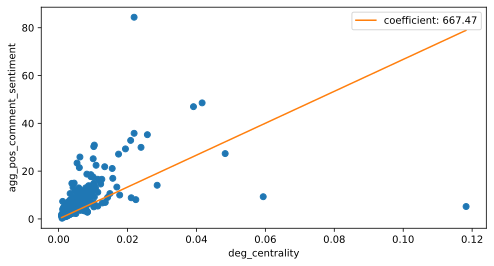

In [ ]:
# full data 
# fit_regression_line(berkeley_regression_avg_df['agg_pos_comment_sentiment'].values, berkeley_regression_avg_df['deg_centrality'].values, 'deg_centrality')

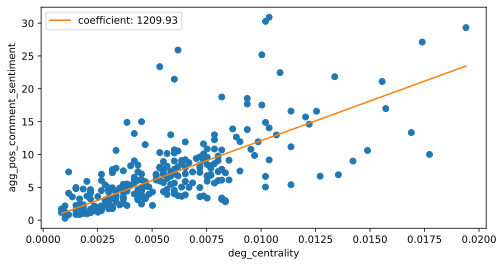

In [ ]:
# removing outliers 
# fit_regression_line(y, berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['deg_centrality'].values, 'deg_centrality')

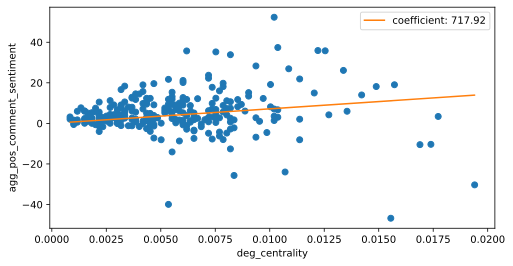

In [ ]:
# fit_regression_line(berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['agg_compound_comment_sentiment'].values, berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['deg_centrality'].values, 'deg_centrality')

### Computing VIF to check for multi-collinearity 

Clustering coefficient

In [ ]:
# for all values of eig_centrality
X = harvard_regression_avg_df[['clustering_coeff', 'num_comments', 'upvote_ratio']].values
y = harvard_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8527
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.466
Time:                        17:42:23   Log-Likelihood:                 328.03
No. Observations:                 348   AIC:                            -648.1
Df Residuals:                     344   BIC:                            -632.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2059      0.088      2.347      0.0